# DAY 4 [S4F]

### Morning Session [DAY 4.0]

##### Random Forest

In [3]:
#importing necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [4]:
# load the data set
df = pd.read_csv('agricultural sustainability.csv')
df.head()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
0,0.374540,6778.284815,964.057410,126.020778,226.809659,0
1,0.950714,1757.259685,4561.488080,175.365653,88.134761,0
2,0.731994,2454.658427,2773.635676,129.654718,194.072090,0
3,0.598658,9086.987697,4219.058597,89.916140,201.678762,0
4,0.156019,6457.861537,1940.223205,104.286142,156.032668,0


In [5]:
df.shape

(200, 6)

In [9]:
df['sustainability'].unique()

array([0, 1])

In [7]:
df.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [10]:
df['sustainability'].nunique()

2

In [11]:
#feature and target selection
X = df[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use']]
y = df['sustainability']

In [12]:
X.shape

(200, 5)

In [13]:
y.shape

(200,)

In [45]:
#training and testing split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=11)

In [46]:
X_train.shape

(160, 5)

In [47]:
X_test.shape

(40, 5)

In [48]:
y_train.shape

(160,)

In [49]:
y_test.shape

(40,)

In [50]:
#instantiate of the model
model = RandomForestClassifier(n_estimators=100,random_state=100)

In [51]:
#train the model
model.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [52]:
#prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
len(y_pred)

40

In [54]:
#Evaluate the model
acc = accuracy_score(y_test,y_pred)
print(f'The accuracy score for RFC is{acc*100:.2f}%')

The accuracy score for RFC is100.00%


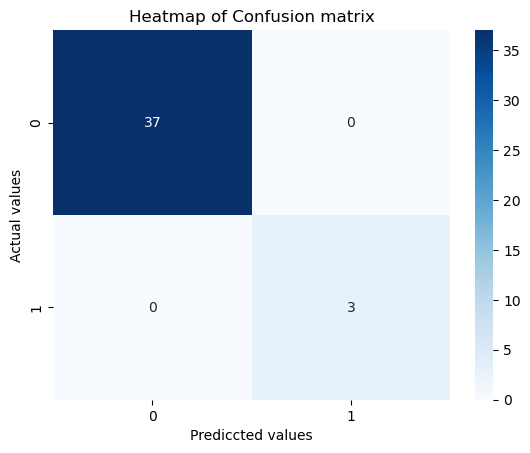

In [64]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')
xticklabels=['Unsustainable','Sustainable']
yticklabels=['Unsustainable','Sustainable']
plt.title('Heatmap of Confusion matrix')
plt.xlabel('Prediccted values')
plt.ylabel('Actual values')
plt.show()

In [66]:
#Classification report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [67]:
#save model
import joblib
joblib.dump(model,'RF_Model.pkl')

['RF_Model.pkl']